<a href="https://colab.research.google.com/github/hardiksharma6555/MLP_code/blob/main/MLPPrevious.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving v4.csv to v4.csv


{'v4.csv': b"Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling\r\nSaint Vincent and the Grenadines,Developing,73.2,156,0,,0,98,0,54.1,0,97,,98,0.1,,,0.72,13.3\r\nChile,Developing,77.3,13,2,6.24,74.14842946,,0,54,3,91,6.4,91,0.1,511.368479,15262754,0.755,13.5\r\nEgypt,Developing,69,176,57,0.16,0,97,80,52.9,70,97,5.21,97,0.1,,,0.623,11.2\r\nRepublic of Korea,Developing,81.2,69,1,9.56,0,99,2,3.4,2,99,7.1,99,0.1,,,,\r\nCosta Rica,Developing,78.1,16,1,3.58,2377.010299,89,0,55.5,1,93,9.66,88,0.1,8199.414621,454528,0.749,13.3\r\nLebanon,Developing,74.9,94,1,1.58,805.3956346,81,12,63.5,1,75,7.19,81,0.1,8763.826274,4337141,0.752,13.3\r\nIndonesia,Developing,66.5,188,182,0.06,33.95837125,62,3825,16,229,77,2.23,76,0.1,747.9817455,2145652,0.604,10.6\r\nQatar,Developing,76.7,83,0,1.24,44.18506273,94,361,65.1,0,97,2.3

In [3]:
data = pd.read_csv('v4.csv')

In [5]:
data.head()

,Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,Saint Vincent and the Grenadines,Developing,73.2,156.0,0,NaN,0.000000,98.0,0,54.1,0,97.0,NaN,98.0,0.1,NaN,NaN,0.720,13.3
1,Chile,Developing,77.3,13.0,2,6.24,74.148429,NaN,0,54.0,3,91.0,6.40,91.0,0.1,511.368479,15262754.0,0.755,13.5
2,Egypt,Developing,69.0,176.0,57,0.16,0.000000,97.0,80,52.9,70,97.0,5.21,97.0,0.1,NaN,NaN,0.623,11.2
3,Republic of Korea,Developing,81.2,69.0,1,9.56,0.000000,99.0,2,3.4,2,99.0,7.10,99.0,0.1,NaN,NaN,NaN,NaN
4,Costa Rica,Developing,78.1,16.0,1,3.58,2377.010299,89.0,0,55.5,1,93.0,9.66,88.0,0.1,8199.414621,454528.0,0.749,13.3


In [4]:
data.shape

(1000, 19)

#Removing rows without Life Expectancy

In [7]:
data = data[data.Life_expectancy.notna()]
data.describe()

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
count,995.000000,995.000000,995.000000,945.000000,995.000000,823.000000,995.000000,987.000000,995.000000,990.000000,930.000000,990.000000,995.000000,852.000000,7.860000e+02,945.000000,945.000000
mean,69.295578,158.572864,28.982915,4.445397,762.758443,80.483597,2313.129648,38.063931,40.107538,82.757576,5.900247,82.626263,1.724925,7273.050868,1.411040e+07,0.625251,11.954921
std,9.506018,122.020933,102.089472,3.996911,1962.313782,25.777438,11622.095051,19.994331,139.808663,23.057887,2.528484,23.278933,5.141192,13759.038478,6.485714e+07,0.215545,3.367567
min,39.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.760000,4.000000,0.100000,1.681350,3.400000e+01,0.000000,0.000000
25%,63.200000,71.000000,0.000000,0.950000,6.557836,77.000000,0.000000,18.800000,0.000000,77.250000,4.260000,79.000000,0.100000,487.097139,2.561048e+05,0.501000,10.200000
50%,72.200000,138.000000,3.000000,3.500000,81.288831,92.000000,19.000000,43.800000,4.000000,93.000000,5.685000,93.000000,0.100000,1803.734872,1.451070e+06,0.675000,12.300000
75%,75.700000,221.000000,22.000000,7.440000,491.776559,97.000000,373.500000,55.900000,28.000000,97.000000,7.470000,97.000000,0.700000,5624.831959,7.505464e+06,0.778000,14.200000
max,89.000000,715.000000,1500.000000,17.310000,19479.911610,99.000000,182485.000000,77.100000,2000.000000,99.000000,17.600000,99.000000,50.600000,113751.850000,1.179681e+09,0.948000,20.700000


In [9]:
data.isnull().sum()

Country                              0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              5
percentage_expenditure               0
Hepatitis_B                        172
Measles                              0
BMI                                  5
under-five_deaths                    0
Polio                                5
Total_expenditure                   11
Diphtheria                           5
HIV_AIDS                             0
GDP                                 23
Population                          20
Income_composition_of_resources     14
Schooling                           14
dtype: int64

In [10]:
len(data['Country'].unique())

73

In [12]:
y = data.loc[:,['Life_expectancy']]
X = data.drop(['Life_expectancy'], axis = 1)

In [13]:
X.shape()

(172, 18)

In [15]:
y.shape

(172, 1)

In [16]:
y

,Life_expectancy
1,77.3
8,71.4
10,81.4
15,79.5
18,45.7
...,...
990,81.2
996,79.0
997,78.8
998,77.8


In [17]:
y.mean()

Life_expectancy    65.52093
dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 32)

In [19]:
type(X_train)

pandas.core.frame.DataFrame

In [20]:
X_train.GDP.mean()

11047.129483008473

In [21]:
X_test.GDP.mean()

8265.37822613871

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87a4fa55d0>,
      dtype=object)

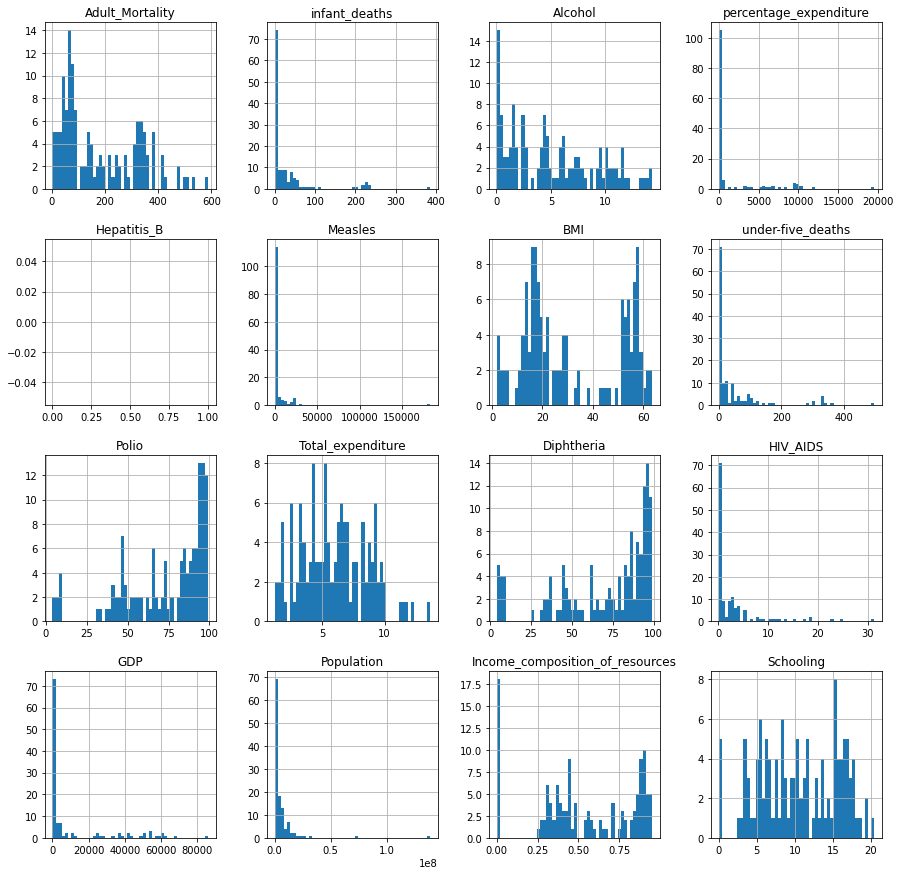

In [23]:
X_train.hist(bins=50,figsize=(15,15))

In [24]:
sns.set_theme(style = "whitegrid")

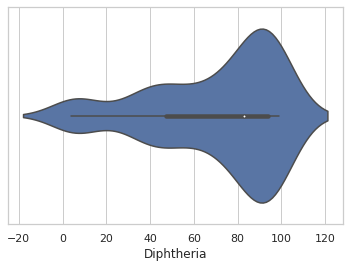

In [25]:
ax = sns.violinplot(x=X_train["Diphtheria"])

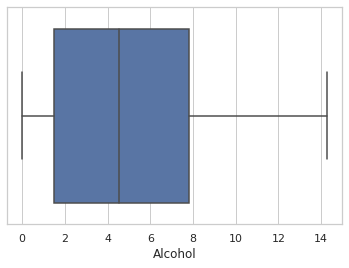

In [30]:
ax = sns.boxplot(x=X_train["Alcohol"])